In [66]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
# Load the data
uploaded=files.upload()


Saving diabetes.csv to diabetes (1).csv


In [ ]:
data = pd.read_csv('diabetes.csv')
print(data)

In [ ]:
# Set the seed
np.random.seed(123)
# Taking random sample of 25 observations
sample = data.sample(n=25)
print(sample)

In [81]:
# Calculate the mean and highest glucose values of the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()
print(' sample mean glucose:', sample_mean_glucose)
print(' sample highest glucose:', sample_highest_glucose)

 sample mean glucose: 130.36
 sample highest glucose: 197


In [82]:
# Calculate the population mean and highest glucose values
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()
print('Population mean glucose:', population_mean_glucose)
print('Population highest glucose:', population_highest_glucose)


Population mean glucose: 120.89453125
Population highest glucose: 199


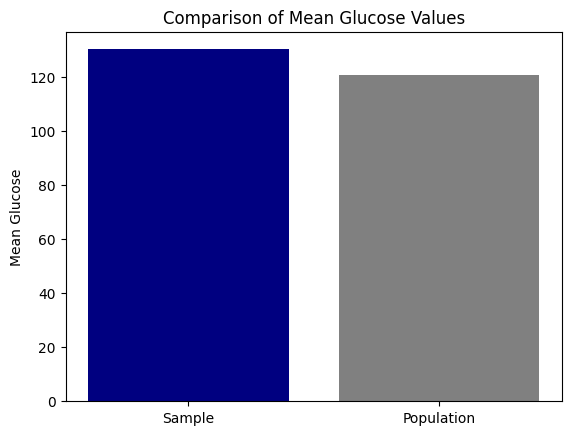

In [71]:
# Create a bar chart to compare the mean glucose values
x = ['Sample', 'Population']
y = [sample_mean_glucose, population_mean_glucose]
colors = ['navy', 'gray']  

plt.bar(x, y, color=colors)

plt.title('Comparison of Mean Glucose Values')
plt.ylabel('Mean Glucose')
plt.show()



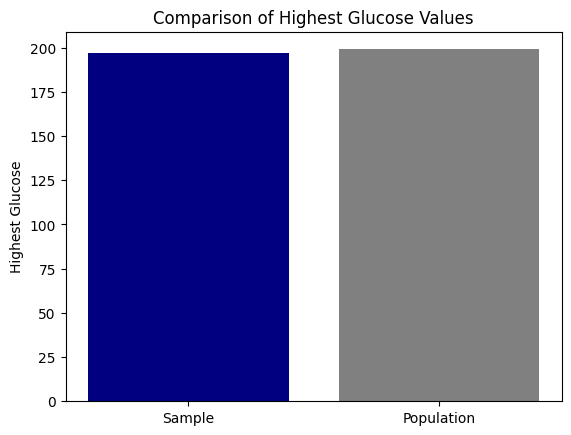

In [72]:
# Create a bar chart to compare the highest glucose values
x = ['Sample', 'Population']
y = [sample_highest_glucose, population_highest_glucose]
colors = ['navy', 'gray'] 
plt.bar(x, y,color=colors)
plt.title('Comparison of Highest Glucose Values')
plt.ylabel('Highest Glucose')
plt.show()

In [83]:
# Find the 98th percentile of BMI for the sample and the population
sample_98th_percentile_BMI = np.percentile(sample['BMI'], 98)
population_98th_percentile_BMI = np.percentile(data['BMI'], 98)
print('The sample 98th percentile of BMI',sample_98th_percentile_BMI)
print('The population 98th percentile of BMI',population_98th_percentile_BMI)


The sample 98th percentile of BMI 45.263999999999996
The population 98th percentile of BMI 47.52599999999996


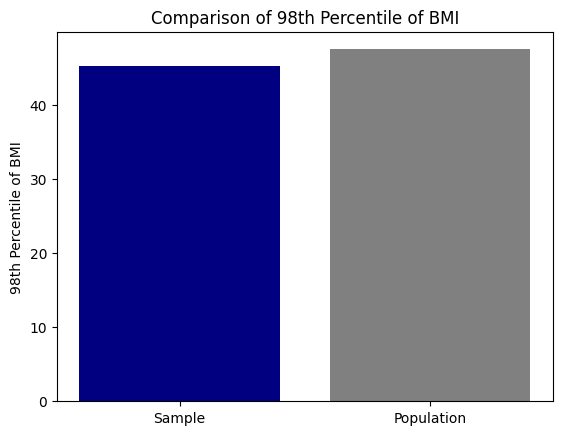

In [74]:
# Create a bar chart to compare the 98th percentile of BMI
x = ['Sample', 'Population']
y = [sample_98th_percentile_BMI, population_98th_percentile_BMI]
colors = ['navy', 'gray'] 
plt.bar(x, y,color=colors)
plt.title('Comparison of 98th Percentile of BMI')
plt.ylabel('98th Percentile of BMI')
plt.show()

In [ ]:
# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

# Set a seed for reproducibility
np.random.seed(123)

# Create a function to generate bootstrap samples
def generate_bootstrap_samples(population, sample_size, n_samples):
    samples = []
    for i in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        samples.append(sample)
    return samples
# Generate 500 bootstrap samples of 150 observations each
bootstrap_samples = generate_bootstrap_samples(diabetes['BloodPressure'], sample_size=150, n_samples=500)
print(bootstrap_samples)


In [85]:
# Calculate the mean, standard deviation, and percentile of each bootstrap sample
bootstrap_means = [np.mean(sample) for sample in bootstrap_samples]
bootstrap_stds = [np.std(sample) for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample, 98) for sample in bootstrap_samples]
print('Bootstrap mean:', np.mean(bootstrap_means))
print('Bootstrap standard deviation:', np.mean(bootstrap_stds))
print('Bootstrap 98th percentile:', np.mean(bootstrap_percentiles))



Bootstrap mean: 69.15222666666666
Bootstrap standard deviation: 19.128709791530135
Bootstrap 98th percentile: 98.03292000000003


In [87]:
# Calculate the mean, standard deviation, and percentile of the population
population_mean = diabetes['BloodPressure'].mean()
population_std = diabetes['BloodPressure'].std()
population_percentile = np.percentile(diabetes['BloodPressure'], 98)
print('population_mean:',population_mean)
print('population_std:',population_std)
print('population_percentile:',population_percentile)

population_mean: 69.10546875
population_std: 19.355807170644777
population_percentile: 99.31999999999994


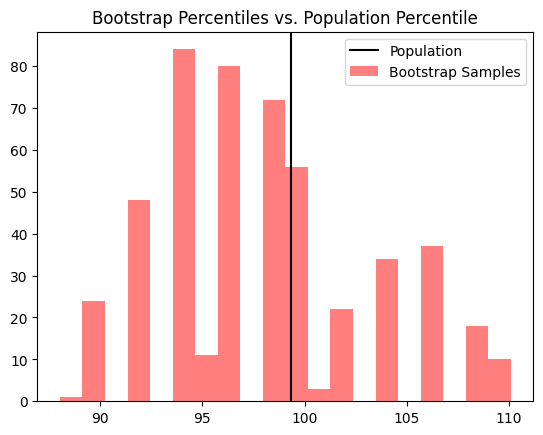

In [88]:

# Create a histogram of the bootstrap percentiles
plt.hist(bootstrap_percentiles, bins=20, color='Red', alpha=0.5)
plt.axvline(x=population_percentile, color='black')
plt.title('Bootstrap Percentiles vs. Population Percentile')
plt.legend(['Population', 'Bootstrap Samples'], loc='upper right')
plt.show()





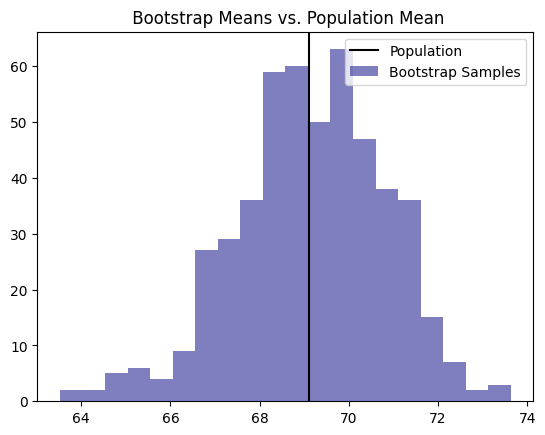

In [89]:
# Create a histogram of the bootstrap means
plt.hist(bootstrap_means, bins=20, color='navy', alpha=0.5)
plt.axvline(x=population_mean, color='black')
plt.title(' Bootstrap Means vs. Population Mean')
plt.legend(['Population', 'Bootstrap Samples'], loc='upper right')
plt.show()




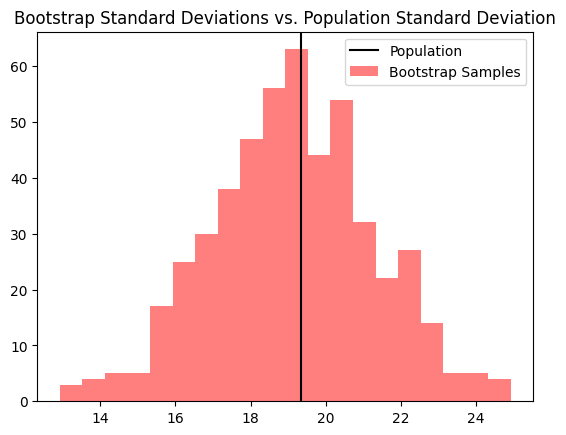

In [90]:

# Create a histogram of the bootstrap standard deviations
plt.hist(bootstrap_stds, bins=20, color='red', alpha=0.5)
plt.axvline(x=population_std, color='black')
plt.title('Bootstrap Standard Deviations vs. Population Standard Deviation')
plt.legend(['Population', 'Bootstrap Samples'], loc='upper right')
plt.show()
